In [26]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# install gensim
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 167kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [45]:
# upload sample text from laptop and extract data
with open("/content/drive/My Drive/NLP/sample-2mb-text-file.txt", 'r', encoding='utf-8') as txt:
  sentences = txt.readlines()

In [46]:
len(sentences)

5697

In [47]:
sentences[0]

'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Velit scelerisque in dictum non consectetur a erat. Sit amet justo donec enim diam vulputate. Id aliquet lectus proin nibh nisl condimentum id venenatis a. Eget gravida cum sociis natoque penatibus et magnis dis. Habitant morbi tristique senectus et netus et. Interdum consectetur libero id faucibus nisl tincidunt eget nullam. Aliquam purus sit amet luctus. Fringilla ut morbi tincidunt augue interdum velit. Neque sodales ut etiam sit. Quam viverra orci sagittis eu volutpat odio facilisis mauris. Ornare suspendisse sed nisi lacus sed. Iaculis at erat pellentesque adipiscing commodo elit at imperdiet dui. Quam nulla porttitor massa id neque aliquam vestibulum morbi. Dignissim diam quis enim lobortis scelerisque fermentum dui faucibus. Turpis egestas integer eget aliquet.\n'

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import re

In [49]:
# removing punctuations
for index in range(len(sentences)):
  sentences[index] = re.sub("[^a-zA-Z]"," ", str(sentences[index]))

In [50]:
# tokenize text of file into sentences
from nltk.tokenize import word_tokenize
word_tokenizer = []
for sent in sentences:
  word_tokens = word_tokenize(sent)
  word_tokenizer.append(word_tokens)

In [51]:
len(word_tokenizer[0])

134

#Building our own or custom word2vec model with CBOW
### Predict center word using context words within window size

In [52]:
# import wrod2vec class from gensim
from gensim.models import Word2Vec
# apply word2vec to sentences
model_cbow = Word2Vec(sentences=word_tokenizer,
                 size=2, # number of dimensions default 100
                 window=2, # window size default 5
                 min_count=2, # minimum count of words to be consider default 5
                 workers=1, # workes default 3
                 sg=0 # method 0 for CBOW and 1 for skip gram
                 )

In [53]:
# total vocabular words for word 2 vec model
words_cbow = list(model_cbow.wv.vocab)
print(words_cbow)

['Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua', 'Velit', 'scelerisque', 'in', 'dictum', 'non', 'a', 'erat', 'Sit', 'justo', 'donec', 'enim', 'diam', 'vulputate', 'Id', 'aliquet', 'lectus', 'proin', 'nibh', 'nisl', 'condimentum', 'id', 'venenatis', 'Eget', 'gravida', 'cum', 'sociis', 'natoque', 'penatibus', 'magnis', 'dis', 'Habitant', 'morbi', 'tristique', 'senectus', 'netus', 'Interdum', 'libero', 'faucibus', 'tincidunt', 'eget', 'nullam', 'Aliquam', 'purus', 'luctus', 'Fringilla', 'augue', 'interdum', 'velit', 'Neque', 'sodales', 'etiam', 'Quam', 'viverra', 'orci', 'sagittis', 'eu', 'volutpat', 'odio', 'facilisis', 'mauris', 'Ornare', 'suspendisse', 'nisi', 'lacus', 'Iaculis', 'at', 'pellentesque', 'commodo', 'imperdiet', 'dui', 'nulla', 'porttitor', 'massa', 'neque', 'aliquam', 'vestibulum', 'Dignissim', 'quis', 'lobortis', 'fermentum', 'Turpis', 'egesta

In [55]:
# we can get word embedding value for a particular word 
model_cbow.wv.__getitem__('consectetur')

array([-0.2674842, -2.1044216], dtype=float32)

In [97]:
# for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = model_cbow.wv.__getitem__(model_cbow.wv.vocab)
X = X[:100]
# create 2D model using PCA
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

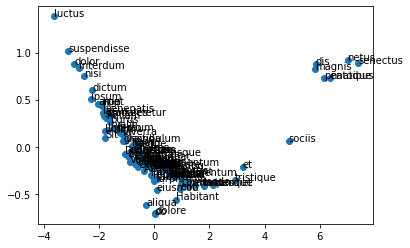

In [98]:
# visualize pca model using matplotlib
plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.vocab)
for i, word in enumerate(words_cbow[:100]):
  plt.annotate(s=word,xy=(result[i,0], result[i,1]))
plt.show()

#Building our own or custom word2vec model with Skip-gram
### Predict context words or neighbour words using center word

In [76]:
# import wrod2vec class from gensim
from gensim.models import Word2Vec
# apply word2vec to sentences
model_skip = Word2Vec(sentences=word_tokenizer,
                 size=2, # number of dimensions default 100
                 window=5, # window size default 5
                 min_count=10, # minimum count of words to be consider default 5
                 workers=1, # workes default 3
                 sg=1 # method 0 for CBOW and 1 for skip gram
                 )

In [77]:
# total vocabular words for word 2 vec model
words = list(model_skip.wv.vocab)
print(words)

['Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'sed', 'tempor', 'ut', 'et', 'magna', 'Velit', 'scelerisque', 'in', 'dictum', 'non', 'a', 'erat', 'Sit', 'justo', 'donec', 'enim', 'diam', 'vulputate', 'Id', 'aliquet', 'lectus', 'proin', 'nibh', 'nisl', 'condimentum', 'id', 'venenatis', 'Eget', 'gravida', 'cum', 'sociis', 'natoque', 'penatibus', 'magnis', 'dis', 'Habitant', 'morbi', 'tristique', 'senectus', 'netus', 'Interdum', 'libero', 'faucibus', 'tincidunt', 'eget', 'nullam', 'Aliquam', 'purus', 'luctus', 'Fringilla', 'augue', 'interdum', 'velit', 'Neque', 'sodales', 'etiam', 'Quam', 'viverra', 'orci', 'sagittis', 'eu', 'volutpat', 'odio', 'facilisis', 'mauris', 'Ornare', 'suspendisse', 'nisi', 'lacus', 'Iaculis', 'at', 'pellentesque', 'commodo', 'imperdiet', 'dui', 'nulla', 'porttitor', 'massa', 'neque', 'aliquam', 'vestibulum', 'Dignissim', 'quis', 'lobortis', 'fermentum', 'Turpis', 'egestas', 'integer', 'In', 'ultrices', 'vitae', 'auctor', 'Dolor', 

In [78]:
# we can get word embedding value for a particular word 
model_skip.wv.__getitem__('consectetur')

array([-0.6658427 , -0.60141945], dtype=float32)

In [99]:
X = model_skip.wv.__getitem__(model_skip.wv.vocab)

In [100]:
pca = PCA(n_components=2)
result = pca1.fit_transform(X)

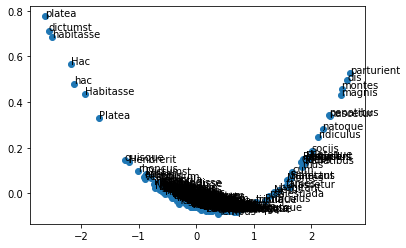

In [101]:
# visualize pca model using matplotlib
plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.vocab)
for i, word in enumerate(words_skip):
  plt.annotate(s=word,xy=(result[i,0], result[i,1]))
plt.show()

# Word embedding model using Pre-trained models 

# Google word2vec

In [31]:
!pwd

/content


In [38]:
cd "drive/My Drive/NLP"

/content/drive/My Drive/NLP


In [40]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [41]:
# just predict or word from king-man+women = ?
result = model.most_similar(positive=['woman','king'], negative=['man'],topn=1)

In [42]:
print(f"Result ? mark in the follwing sentence King - man = ? - woman :- {result}") 

Result ? mark in the follwing sentence King - man = ? - woman :- [('queen', 0.7118192911148071)]


# stanford Glove Embeddings
### Global Vectors for Word Representation
##### we have to convert glove word embedding file to word2vec using glove2word2vec() function

In [44]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [92]:
# import glove2word2vec() from gensim
from gensim.scripts.glove2word2vec import glove2word2vec

In [94]:
# glove file total 4 subfiles with 50, 100, 200, and 300 dimensions 
# load 100 dimentions word embedding file
from gensim.models import KeyedVectors
input_file = "glove.6B.100d.txt"
output_file = "glove.6B.100d.txt.word2vec"

# convert input file to word2vec format using glove2word2vec function
glove2word2vec(input_file, word2vec_output_file=output_file)

(400000, 100)

In [95]:
# load word2vec file to model , this file contain ASCII values 
# so binary value is False
model = KeyedVectors.load_word2vec_format(output_file, binary=False)

In [96]:
# same example as above
result = model.most_similar(positive=['woman','king'], negative=['man'],topn=1)
print(f"Result :- {result}")

Result :- [('queen', 0.7698541283607483)]
